<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_2_8_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_2.8'

In [4]:
os.listdir(base_path)

['data_add_delta_2.8_n20.csv',
 'data_add_delta_2.8_n30.csv',
 'data_add_delta_2.8_n60.csv',
 'data_add_delta_2.8_n120.csv',
 'data_add_delta_2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.8_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,92.939511,61.262619,43.365078,50854.728547,51062.295754,12158.233995,38904.061759
1,0.0,1.0,21.710516,94.525180,31.383993,-6659.515099,-6501.895411,-12882.399587,6380.504176
2,0.0,2.0,99.906666,81.380687,45.343353,180060.365675,180296.996381,15938.400652,164358.595729
3,0.0,3.0,97.726620,35.032531,85.059607,40237.699495,40465.518253,12638.125096,27827.393157
4,0.0,4.0,99.265047,70.507157,53.134768,-110879.728351,-110646.821379,15109.035083,-125755.856462
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,80.043596,28.001912,23.922495,-12.787204,129.180799,-59401.031196,59530.211995
29996,999.0,26.0,70.078982,66.156622,49.727217,138126.517823,138322.480644,16562.954490,121759.526154
29997,999.0,27.0,57.197492,73.346730,31.861327,-235854.345126,-235681.939577,6064.602026,-241746.541603
29998,999.0,28.0,63.619158,84.661090,41.807729,296704.108006,296904.195983,31458.578764,265445.617218


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,92.939511,61.262619,43.365078,50854.728547,51062.295754,12158.233995,38904.061759
1,0.0,1.0,21.710516,94.525180,31.383993,-6659.515099,-6501.895411,-12882.399587,6380.504176
2,0.0,2.0,99.906666,81.380687,45.343353,180060.365675,180296.996381,15938.400652,164358.595729
3,0.0,3.0,97.726620,35.032531,85.059607,40237.699495,40465.518253,12638.125096,27827.393157
4,0.0,4.0,99.265047,70.507157,53.134768,-110879.728351,-110646.821379,15109.035083,-125755.856462
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,80.043596,28.001912,23.922495,-12.787204,129.180799,-59401.031196,59530.211995
29996,999.0,26.0,70.078982,66.156622,49.727217,138126.517823,138322.480644,16562.954490,121759.526154
29997,999.0,27.0,57.197492,73.346730,31.861327,-235854.345126,-235681.939577,6064.602026,-241746.541603
29998,999.0,28.0,63.619158,84.661090,41.807729,296704.108006,296904.195983,31458.578764,265445.617218


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...         y_hat          e_hat
rep   index                        ...                             
0.0   0.0    92.939511  61.262619  ...  12158.233995   38904.061759
      1.0    21.710516  94.525180  ... -12882.399587    6380.504176
      2.0    99.906666  81.380687  ...  15938.400652  164358.595729
      3.0    97.726620  35.032531  ...  12638.125096   27827.393157
      4.0    99.265047  70.507157  ...  15109.035083 -125755.856462
...                ...        ...  ...           ...            ...
999.0 25.0   80.043596  28.001912  ... -59401.031196   59530.211995
      26.0   70.078982  66.156622  ...  16562.954490  121759.526154
      27.0   57.197492  73.346730  ...   6064.602026 -241746.541603
      28.0   63.619158  84.661090  ...  31458.578764  265445.617218
      29.0   38.903725  68.963974  ...  66539.083318  -13116.456992

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...         y_hat          e_hat
rep   index                        ...                             
0.0   0.0    92.939511  61.262619  ...  12158.233995   38904.061759
      1.0    21.710516  94.525180  ... -12882.399587    6380.504176
      2.0    99.906666  81.380687  ...  15938.400652  164358.595729
      3.0    97.726620  35.032531  ...  12638.125096   27827.393157
      4.0    99.265047  70.507157  ...  15109.035083 -125755.856462
...                ...        ...  ...           ...            ...
999.0 25.0   80.043596  28.001912  ... -59401.031196   59530.211995
      26.0   70.078982  66.156622  ...  16562.954490  121759.526154
      27.0   57.197492  73.346730  ...   6064.602026 -241746.541603
      28.0   63.619158  84.661090  ...  31458.578764  265445.617218
      29.0   38.903725  68.963974  ...  66539.083318  -13116.456992

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,92.939511,61.262619,43.365078,50854.728547,51062.295754,12158.233995,38904.061759
1,0.0,1.0,21.710516,94.525180,31.383993,-6659.515099,-6501.895411,-12882.399587,6380.504176
2,0.0,2.0,99.906666,81.380687,45.343353,180060.365675,180296.996381,15938.400652,164358.595729
3,0.0,3.0,97.726620,35.032531,85.059607,40237.699495,40465.518253,12638.125096,27827.393157
4,0.0,4.0,99.265047,70.507157,53.134768,-110879.728351,-110646.821379,15109.035083,-125755.856462
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,80.043596,28.001912,23.922495,-12.787204,129.180799,-59401.031196,59530.211995
29996,999.0,26.0,70.078982,66.156622,49.727217,138126.517823,138322.480644,16562.954490,121759.526154
29997,999.0,27.0,57.197492,73.346730,31.861327,-235854.345126,-235681.939577,6064.602026,-241746.541603
29998,999.0,28.0,63.619158,84.661090,41.807729,296704.108006,296904.195983,31458.578764,265445.617218


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...         y_hat          e_hat
rep   index                        ...                             
0.0   0.0    92.939511  61.262619  ...  12158.233995   38904.061759
      1.0    21.710516  94.525180  ... -12882.399587    6380.504176
      2.0    99.906666  81.380687  ...  15938.400652  164358.595729
      3.0    97.726620  35.032531  ...  12638.125096   27827.393157
      4.0    99.265047  70.507157  ...  15109.035083 -125755.856462
...                ...        ...  ...           ...            ...
999.0 25.0   80.043596  28.001912  ... -59401.031196   59530.211995
      26.0   70.078982  66.156622  ...  16562.954490  121759.526154
      27.0   57.197492  73.346730  ...   6064.602026 -241746.541603
      28.0   63.619158  84.661090  ...  31458.578764  265445.617218
      29.0   38.903725  68.963974  ...  66539.083318  -13116.456992

[30000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

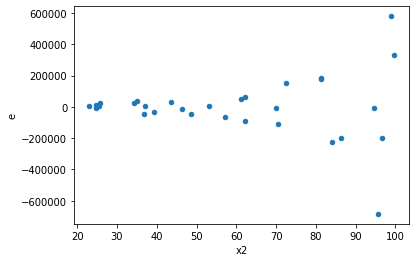

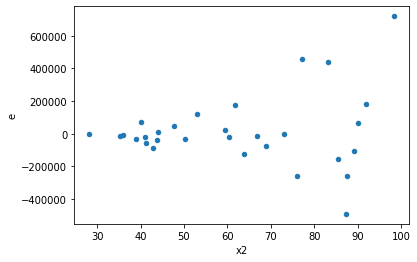

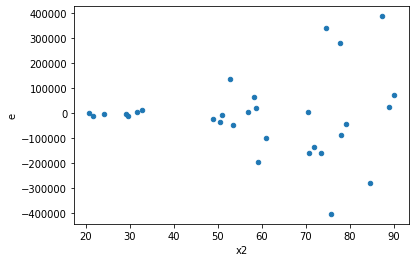

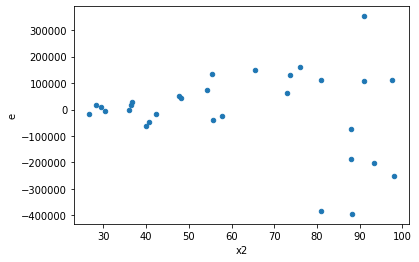

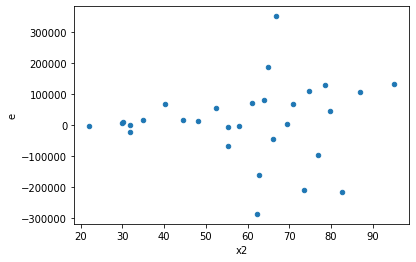

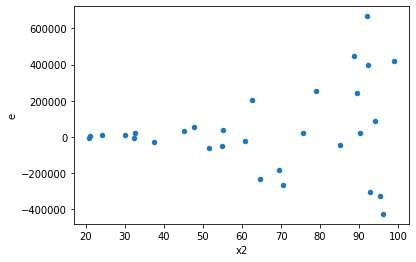

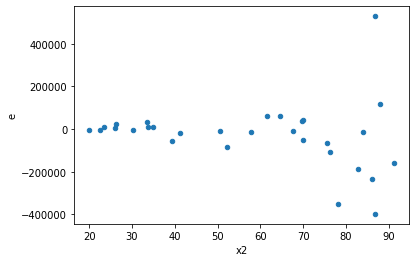

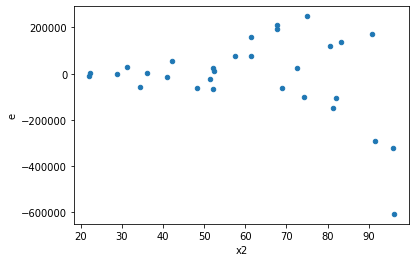

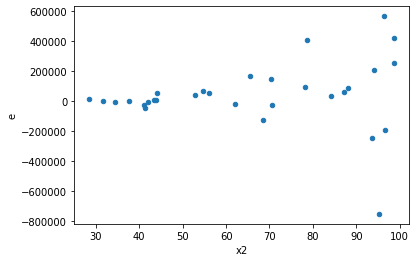

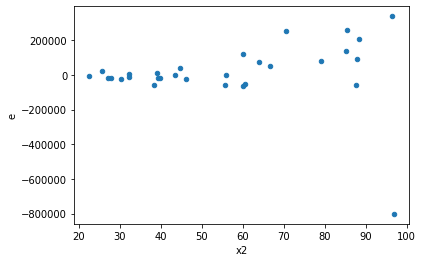

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,9.0,9.0,1134179174366.7708,4014670967.6166005,141772396795.84634,501833870.95207506,282.50862486997323,1.205337829546238e-09,0.9999999993973311,Reject005=0 : Heteroscedasticity
1.0,9.0,9.0,864274042164.0538,14247070198.115616,108034255270.50673,1780883774.764452,60.66328235529904,1.1133655997142e-06,0.9999994433172001,Reject005=0 : Heteroscedasticity
2.0,9.0,9.0,534343345755.4058,18320057721.118168,66792918219.42573,2290007215.139771,29.16712129893836,2.6448595516592732e-05,0.9999867757022417,Reject005=0 : Heteroscedasticity
3.0,9.0,9.0,483703964437.64935,11665442549.682024,60462995554.70617,1458180318.710253,41.4646904631007,5.839504753968328e-06,0.999997080247623,Reject005=0 : Heteroscedasticity
4.0,9.0,9.0,133504550695.8809,6915977484.982148,16688068836.985113,864497185.6227685,19.303786194472483,0.00014981208292663695,0.9999250939585367,Reject005=0 : Heteroscedasticity
5.0,9.0,9.0,1183861615556.8374,9859457891.87034,147982701944.60468,1232432236.4837925,120.07370268633082,5.470430419762806e-08,0.9999999726478479,Reject005=0 : Heteroscedasticity
6.0,9.0,9.0,482691431619.44763,4398588184.290014,60336428952.430954,549823523.0362518,109.73780935970025,8.155470965220957e-08,0.9999999592226452,Reject005=0 : Heteroscedasticity
7.0,9.0,9.0,417858867241.6544,11123109104.074453,52232358405.2068,1390388638.0093067,37.56673276616432,8.943927972682175e-06,0.9999955280360137,Reject005=0 : Heteroscedasticity
8.0,9.0,9.0,1258229713308.7095,6838918240.249652,157278714163.58868,854864780.0312065,183.98080940689505,8.189221967214166e-09,0.999999995905389,Reject005=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,1134179174366.7708,4014670967.6166005,141772396795.84634,501833870.95207506,282.50862486997323,1.205337829546238e-09,Reject005=0 : Heteroscedasticity
1.0,9.0,9.0,864274042164.0538,14247070198.115616,108034255270.50673,1780883774.764452,60.66328235529904,1.1133655997142e-06,Reject005=0 : Heteroscedasticity
2.0,9.0,9.0,534343345755.4058,18320057721.118168,66792918219.42573,2290007215.139771,29.16712129893836,2.6448595516592732e-05,Reject005=0 : Heteroscedasticity
3.0,9.0,9.0,483703964437.64935,11665442549.682024,60462995554.70617,1458180318.710253,41.4646904631007,5.839504753968328e-06,Reject005=0 : Heteroscedasticity
4.0,9.0,9.0,133504550695.8809,6915977484.982148,16688068836.985113,864497185.6227685,19.303786194472483,0.00014981208292663695,Reject005=0 : Heteroscedasticity
5.0,9.0,9.0,1183861615556.8374,9859457891.87034,147982701944.60468,1232432236.4837925,120.07370268633082,5.470430419762806e-08,Reject005=0 : Heteroscedasticity
6.0,9.0,9.0,482691431619.44763,4398588184.290014,60336428952.430954,549823523.0362518,109.73780935970025,8.155470965220957e-08,Reject005=0 : Heteroscedasticity
7.0,9.0,9.0,417858867241.6544,11123109104.074453,52232358405.2068,1390388638.0093067,37.56673276616432,8.943927972682175e-06,Reject005=0 : Heteroscedasticity
8.0,9.0,9.0,1258229713308.7095,6838918240.249652,157278714163.58868,854864780.0312065,183.98080940689505,8.189221967214166e-09,Reject005=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    994
Reject005=1 : Homoscedasticity        6
Name: Result_test, dtype: int64